Import the Necessary Libraries

In [13]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

Extract data from the dataset

If data has not been downloaded yet, download it from Here

In [15]:
fldr=r"C:\Users\DHANUNJAY\OneDrive\Desktop\Age Gender Detector\UTKFace"

In [16]:
import os
flies=os.listdir(fldr)

Create List of images from the dataset

In [17]:
import cv2
ages=[]
genders=[]
images=[]

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

    

C:\Users\DHANUNJAY\OneDrive\Desktop\Age Gender Detector\UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
C:\Users\DHANUNJAY\OneDrive\Desktop\Age Gender Detector\UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
C:\Users\DHANUNJAY\OneDrive\Desktop\Age Gender Detector\UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
C:\Users\DHANUNJAY\OneDrive\Desktop\Age Gender Detector\UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
C:\Users\DHANUNJAY\OneDrive\Desktop\Age Gender Detector\UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
C:\Users\DHANUNJAY\OneDrive\Desktop\Age Gender Detector\UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
C:\Users\DHANUNJAY\OneDrive\Desktop\Age Gender Detector\UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
C:\Users\DHANUNJAY\OneDrive\Desktop\Age Gender Detector\UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
C:\Users\DHANUNJAY\OneDrive\Desktop\Age Gender Detector\UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
C:\Users\DHANUNJAY\OneDrive\Desktop\Age Gender Detector\UTKFace/100_1_2_2


Create List of Age and Gender from the dataset

In [18]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)


Viewing a sample

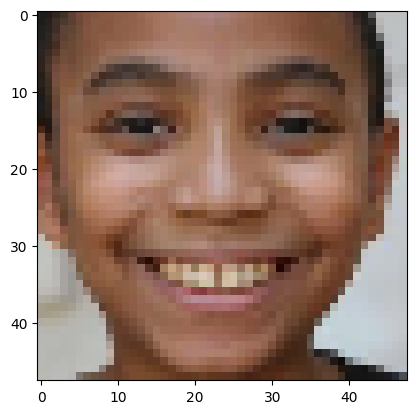

In [19]:
plt.imshow(images[87])

In [20]:

print(ages[87])

10


In [21]:
print(genders[87])

0


Saving images array,ages array, and genders array in the system

In [22]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [23]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

Finding the no. of Male and Female samples respectively

In [24]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


Plotting the No. of Male and Female Samples

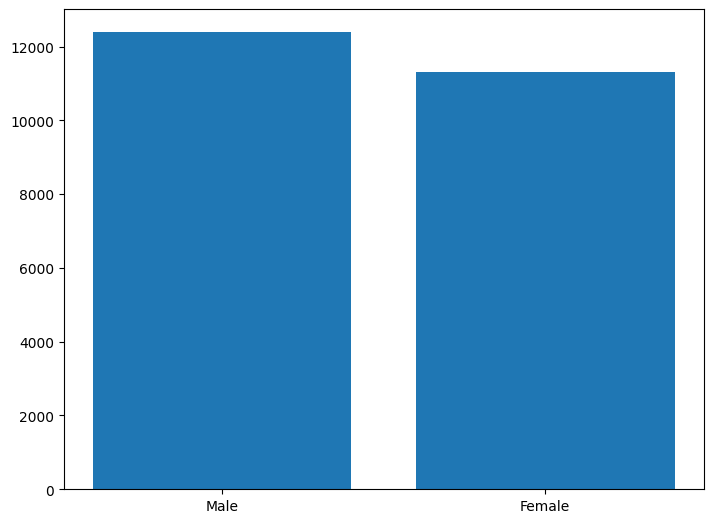

In [25]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

Finding The no. of samples in each age

In [26]:

values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


Converting Age counts to lists

In [27]:

val=values.tolist()
cnt=counts.tolist()


Plotting The Samples Agewise

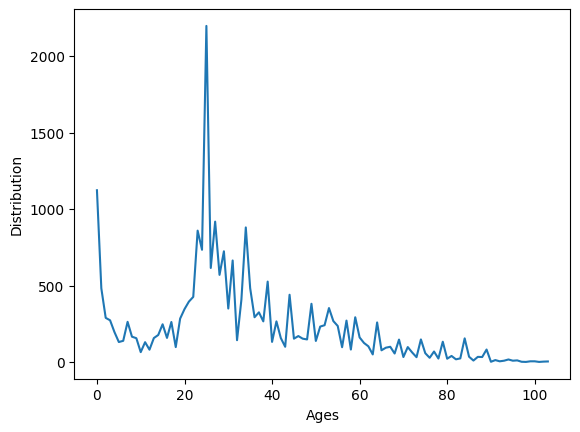

In [28]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

Definig Labes for Output

In [29]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

Creating another list of images from existing one


For better learning

In [30]:

images_f_2=images_f/255

In [31]:
images_f_2.shape

(23708, 48, 48, 3)

In [35]:
labels_f=np.array(labels)

Splitting The Dataset into test and train

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, Y_train,Y_test = train_test_split(images_f_2, labels_f, test_size=0.25)

In [38]:

Y_train[0:5]

array([[26,  0],
       [36,  1],
       [23,  1],
       [32,  1],
       [26,  1]])

Splitting 'Y_test' and 'Y_train' further

For better understanding

In [39]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [40]:
Y_train_2[0][0:5]

array([0, 1, 1, 1, 1])

In [41]:
Y_train_2[1][0:5]

array([26, 36, 23, 32, 26])


Defining the Model

In [42]:

def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [43]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [44]:
Model=model((48,48,3))

In [45]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 32)   896         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 48, 48, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['dropout[0][0]']                
                                                                                              

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint

Initializing the Model

In [47]:
fle_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

Running the Model

This will take some time


In [72]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 8.4672 - sex_out_loss: 0.3577 - age_out_loss: 7.7413 - sex_out_accuracy: 0.8342 - age_out_accuracy: 0.0465
Epoch 1: val_loss did not improve from 8.39688
278/278 [==============================] - 99s 356ms/step - loss: 8.4672 - sex_out_loss: 0.3577 - age_out_loss: 7.7413 - sex_out_accuracy: 0.8342 - age_out_accuracy: 0.0465 - val_loss: 10.4489 - val_sex_out_loss: 0.3150 - val_age_out_loss: 9.7593 - val_sex_out_accuracy: 0.8674 - val_age_out_accuracy: 0.0462
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 8.2160 - sex_out_loss: 0.3456 - age_out_loss: 7.4897 - sex_out_accuracy: 0.8406 - age_out_accuracy: 0.0477
Epoch 2: val_loss did not improve from 8.39688
278/278 [==============================] - 117s 422ms/step - loss: 8.2160 - sex_out_loss: 0.3456 - age_out_loss: 7.4897 - sex_out_accuracy: 0.8406 - age_out_accuracy: 0.0477 - val_loss: 10.9428 - val_sex_out_loss: 0.3321 - val_age_out_loss: 

Model Evaluation

In [74]:

Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 11s 54ms/step - loss: 7.3381 - sex_out_loss: 0.2481 - age_out_loss: 6.3445 - sex_out_accuracy: 0.8966 - age_out_accuracy: 0.0462


[7.338128089904785,
 0.24810676276683807,
 6.344522953033447,
 0.8965749740600586,
 0.04622912034392357]

In [75]:
pred=Model.predict(X_test)

186/186 [==============================] - 10s 52ms/step


In [76]:
pred[1]

array([[31.646965 ],
       [42.030575 ],
       [30.049692 ],
       ...,
       [ 4.5731444],
       [ 8.5505705],
       [27.649023 ]], dtype=float32)


Plotting Loss

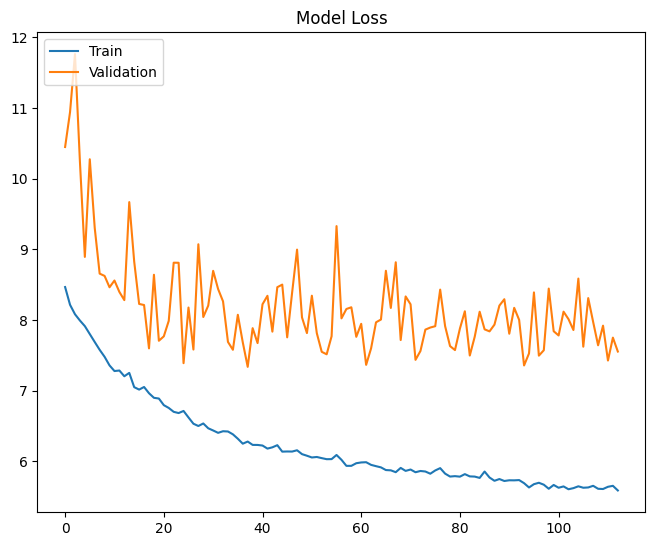

In [77]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

Plotting Sex Accuracy

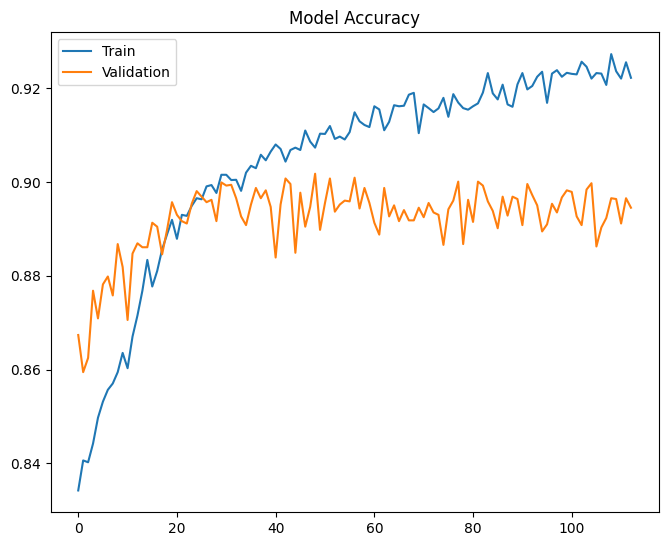

In [78]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


Plotting Gender Accuracy

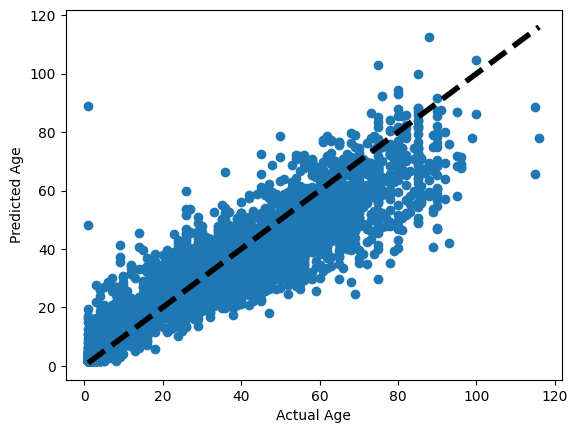

In [79]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

Making Report of the Model (Gender Only)

In [80]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [82]:
report=classification_report(Y_test_2[0],Pred_l)

In [83]:

print(report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3160
           1       0.90      0.87      0.89      2767

    accuracy                           0.90      5927
   macro avg       0.90      0.89      0.90      5927
weighted avg       0.90      0.90      0.90      5927



Making Heatmap of the Model (Gender only)

In [84]:
results=confusion_matrix(Y_test_2[0],Pred_l)

<AxesSubplot:>

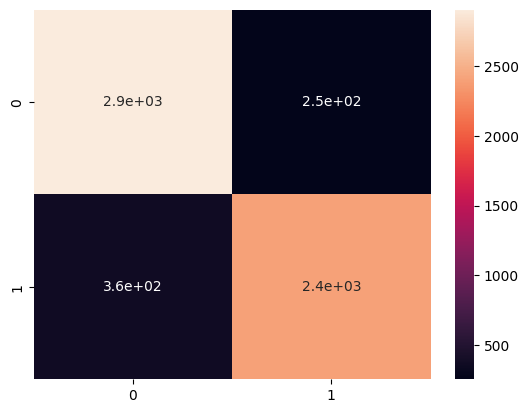

In [85]:
import seaborn as sns
sns.heatmap(results,annot=True)

Testing The Images Ourself

In [86]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])


Test 1

1/1 [==============================] - 0s 70ms/step
Predicted Age is 105
Predicted Gender is Female


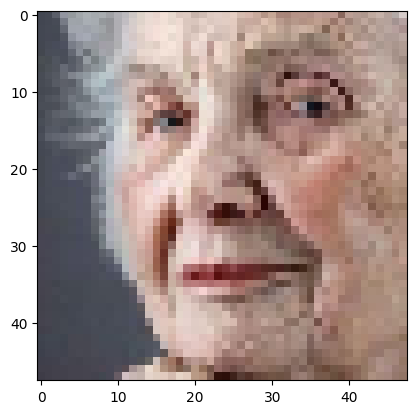

In [87]:
test_image(4,images_f,images_f_2,Model)

Test 2

1/1 [==============================] - 0s 72ms/step
Predicted Age is 9
Predicted Gender is Male


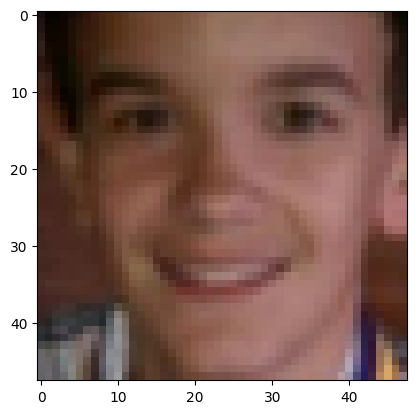

In [88]:
test_image(23,images_f,images_f_2,Model)

Test 3

1/1 [==============================] - 0s 63ms/step
Predicted Age is 16
Predicted Gender is Male


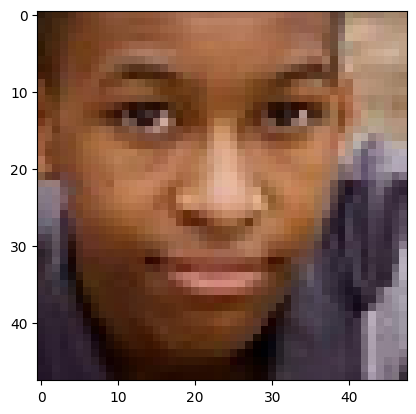

In [97]:
test_image(510,images_f,images_f_2,Model)

Test 4

1/1 [==============================] - 0s 84ms/step
Predicted Age is 8
Predicted Gender is Male


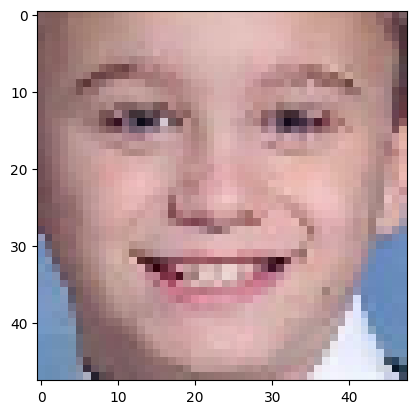

In [94]:
test_image(196,images_f,images_f_2,Model)

Test 5

1/1 [==============================] - 0s 50ms/step
Predicted Age is 21
Predicted Gender is Male


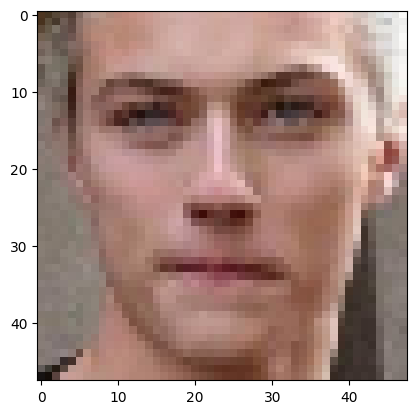

In [92]:
test_image(1208,images_f,images_f_2,Model)